In [7]:
# 📌 Day 5: Sharpe Ratio + Weighted Portfolio Return
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated daily returns for 3 stocks
data = {
    "Date": pd.date_range(start="2024-01-01", periods=30),
    "INFY": np.random.normal(0.001, 0.02, 30),
    "TCS": np.random.normal(0.0008, 0.018, 30),
    "HDFCBANK": np.random.normal(0.0012, 0.025, 30)
}
df = pd.DataFrame(data)

# Define weights for each stock
weights = {"INFY": 0.4, "TCS": 0.3, "HDFCBANK": 0.3}
summary_data = []

for stock in ["INFY", "TCS", "HDFCBANK"]:
    returns = df[stock]
    avg_return = returns.mean() * 252 * 100
    volatility = returns.std() * np.sqrt(252) * 100
    sharpe = avg_return / volatility
    summary_data.append({
        "Stock": stock,
        "Average Return (%)": round(avg_return, 2),
        "Volatility (%)": round(volatility, 2),
        "Sharpe Ratio": round(sharpe, 2),
        "Weight": weights[stock]
    })

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv("Day5_Portfolio_Sharpe_Summary.csv", index=False)
print("✅ Day 5 saved as: Day5_Portfolio_Sharpe_Summary.csv")

✅ Day 5 saved as: Day5_Portfolio_Sharpe_Summary.csv


In [8]:
# 📌 Day 8: Risk Buckets
df_risk = summary_df.copy()
bins = [0, 0.6, 1.0, 1.5, 3]
labels = ["Low", "Moderate", "High", "Very High"]
df_risk["Risk Level"] = pd.cut(df_risk["Sharpe Ratio"], bins=bins, labels=labels, include_lowest=True)
df_risk = df_risk[["Stock", "Risk Level"]]
df_risk.to_csv("Day8_Risk_Buckets.csv", index=False)
print("✅ Day 8 saved as: Day8_Risk_Buckets.csv")

✅ Day 8 saved as: Day8_Risk_Buckets.csv


In [9]:
# 📌 Day 9: Fundamental Screener (Mock Data)
fundamental_data = [
    {"Stock": "INFY", "P/E Ratio": 23.4, "Market Cap (₹ Cr)": 650000, "Sector": "IT"},
    {"Stock": "TCS", "P/E Ratio": 29.1, "Market Cap (₹ Cr)": 1180000, "Sector": "IT"},
    {"Stock": "HDFCBANK", "P/E Ratio": 21.7, "Market Cap (₹ Cr)": 960000, "Sector": "Banking"},
]
df_fundamentals = pd.DataFrame(fundamental_data)
df_fundamentals.to_csv("Day9_Fundamental_Screener.csv", index=False)
print("✅ Day 9 saved as: Day9_Fundamental_Screener.csv")

✅ Day 9 saved as: Day9_Fundamental_Screener.csv


✅ Final Portfolio Summary:
      Stock  Average Return (%)  Volatility (%)  Sharpe Ratio  Weight  \
0      INFY              -36.51           30.81         -1.19     0.4   
1       TCS               -6.21           26.42         -0.24     0.3   
2  HDFCBANK               21.30           35.43          0.60     0.3   

  Risk Level  P/E Ratio  Market Cap (₹ Cr)   Sector  
0        NaN       23.4             650000       IT  
1        NaN       29.1            1180000       IT  
2        Low       21.7             960000  Banking  


/tmp/ipython-input-10-2858621097.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=summary, x="Risk Level", y="Average Return (%)", palette="Set2")


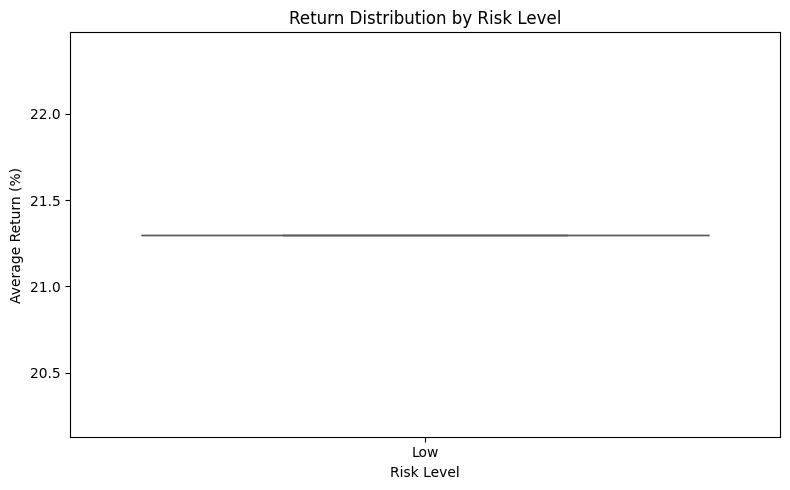

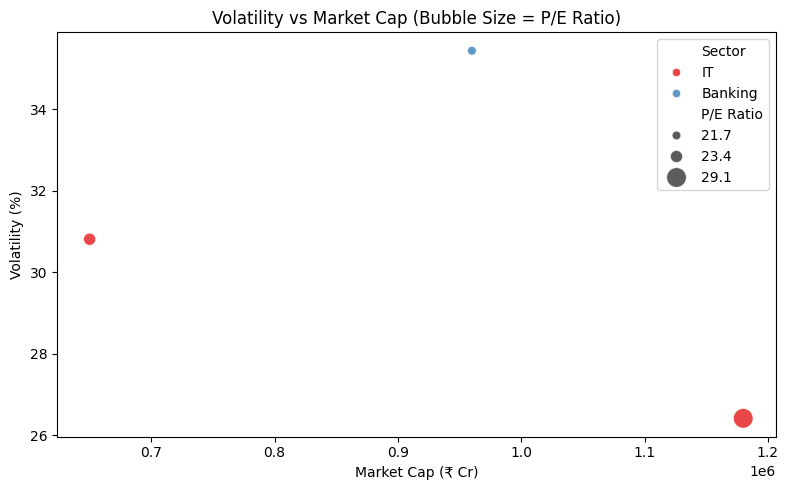

✅ Final summary saved as: Day10_Final_Portfolio_Summary.csv


In [10]:
# 📌 Day 10: Dashboard + Final Summary

# Load the CSV files
returns = pd.read_csv("Day5_Portfolio_Sharpe_Summary.csv")
risk = pd.read_csv("Day8_Risk_Buckets.csv")
fundamentals = pd.read_csv("Day9_Fundamental_Screener.csv")

# Merge all data
summary = returns.merge(risk, on="Stock", how="left")
summary = summary.merge(fundamentals, on="Stock", how="left")

# Show final merged data
print("✅ Final Portfolio Summary:")
print(summary)

# Plot 1: Boxplot for Return vs Risk Level
plt.figure(figsize=(8, 5))
sns.boxplot(data=summary, x="Risk Level", y="Average Return (%)", palette="Set2")
plt.title("Return Distribution by Risk Level")
plt.tight_layout()
plt.show()

# Plot 2: Scatterplot for Volatility vs Market Cap
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=summary,
    x="Market Cap (₹ Cr)",
    y="Volatility (%)",
    hue="Sector",
    size="P/E Ratio",
    sizes=(40, 200),
    palette="Set1",
    alpha=0.8
)
plt.title("Volatility vs Market Cap (Bubble Size = P/E Ratio)")
plt.tight_layout()
plt.show()

# Save final output
summary.to_csv("Day10_Final_Portfolio_Summary.csv", index=False)
print("✅ Final summary saved as: Day10_Final_Portfolio_Summary.csv")